In [1]:
%let FileName='W_AviationData.txt';

proc import datafile=&FileName
    out=work.planes
    dbms=csv replace;
    getname=yes;
    delimiter='|';
    options validvarname = V7;
RUN;    

SAS Connection established. Subprocess id is 15599



In [2]:
PROC contents data=work.planes;
run;


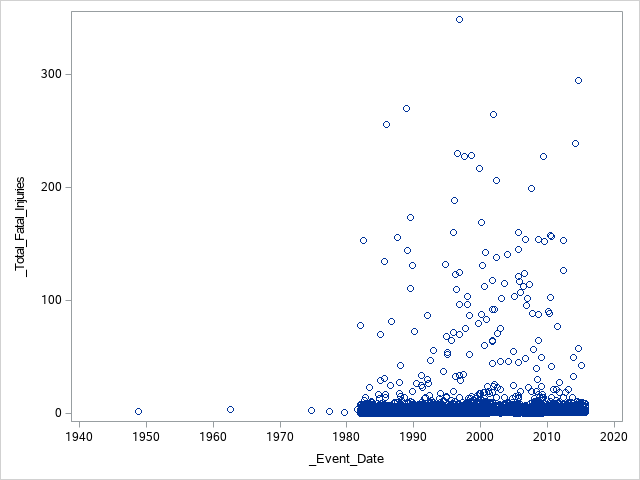

In [3]:
PROC SGPLOT data=work.planes;
scatter x=_Event_Date
        y=_Total_Fatal_Injuries;
RUN;


In [4]:
data work.planes_recent;
set work.planes;
if _event_date >1980 and _total_fatal_injuries>10 then output;
run;


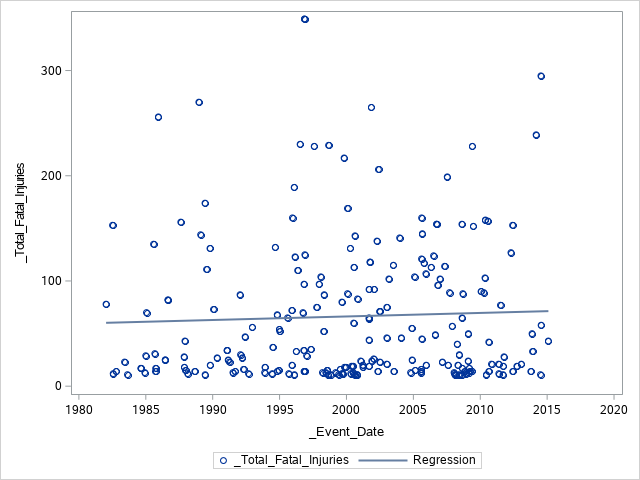

In [5]:
proc sgplot data=work.planes_recent;
scatter x=_event_date
        y=_total_fatal_injuries;
reg x=_event_date
    y=_total_fatal_injuries;
run;


In [6]:
Data work.planes_recent2 (keep= nb_jours _event_date _total_fatal_injuries _airport_name number_event _country);
set work.planes_recent;
attrib nb_jours
label ="Nombre de jours"
length = 3;
nb_jours = MAX(of _event_date:) - year(_Event_Date);
number_event = N(of _event_date:);
run;


In [7]:
proc print data=work.planes_recent2 (obs=5);
run;

Obs,_Event_Date,_Country,_Airport_Name,_Total_Fatal_Injuries,nb_jours,number_event
1,02/04/2015,Taiwan,,43,18108,1
2,07/23/2014,Taiwan,"Magong, Taiwan",58,17912,1
3,07/17/2014,Ukraine,N/A,295,17904,1
4,07/05/2014,Poland,,11,17892,1
5,03/08/2014,Malaysia,Kuala Lumper Internationa,239,17776,1


In [8]:
PROC SORT data=work.planes_recent2 out=work.planes_recent_sort;
by _Airport_Name;
run;

In [9]:
data work.planes_recent_sort_2;
set work.planes_recent_sort;
by _airport_name;
if first._airport_name then output;
run;


In [10]:
proc print data=work.planes_recent_sort_2 (obs=5);
run;

Obs,_Event_Date,_Country,_Airport_Name,_Total_Fatal_Injuries,nb_jours,number_event
1,02/04/2015,Taiwan,,43,18108,1
2,06/01/1999,United States,ADAMS FIELD,11,12396,1
3,08/06/1997,United States,AGANA INTERNATIONAL AIRPO,228,11734,1
4,03/29/2001,United States,ASPEN-PITKIN CO/SARDY FIE,18,13062,1
5,07/10/1991,United States,BIRMINGHAM AIRPORT,13,9522,1


In [11]:
data work.planes_recents_sort_3;
set work.planes_recent_sort_2;
by _airport_name;
attrib delta_airport
       label = "delta Airport"
       length=3;
airport_delta = _total_fatal_injuries - lag(_total_fatal_injuries);
run;


In [12]:
proc print data=work.planes_recents_sort_3 (obs=10);
run;

Obs,_Event_Date,_Country,_Airport_Name,_Total_Fatal_Injuries,nb_jours,number_event,delta_airport,airport_delta
1,02/04/2015,Taiwan,,43,18108,1,.,.
2,06/01/1999,United States,ADAMS FIELD,11,12396,1,.,-32
3,08/06/1997,United States,AGANA INTERNATIONAL AIRPO,228,11734,1,.,217
4,03/29/2001,United States,ASPEN-PITKIN CO/SARDY FIE,18,13062,1,.,-210
5,07/10/1991,United States,BIRMINGHAM AIRPORT,13,9522,1,.,-5
6,08/27/2006,United States,BLUE GRASS,49,15034,1,.,36
7,07/28/2010,Pakistan,Benazir Bhutto Internatio,157,16460,1,.,108
8,03/22/2009,United States,Bert Mooney Airport,14,15968,1,.,-143
9,02/12/2009,United States,Buffalo-Niagara Internati,50,15930,1,.,36
10,09/01/2008,Congo,Bukavu,17,15768,1,.,-33


In [13]:
proc sort data=work.planes_recents_sort_3 out=work.planes4;
by _country;
run;

proc print data=work.planes4 (obs=2);
run;

Obs,_Event_Date,_Country,_Airport_Name,_Total_Fatal_Injuries,nb_jours,number_event,delta_airport,airport_delta
1,12/21/1987,,EUGENE ISLAND 190 HELIPAD,15,8228,1,.,-14
2,01/01/1985,Bolivia,LA PAZ INTERNATIONAL,29,7147,1,.,-210


In [14]:
data work.planes5;
set work.planes4;
by _country;
if first._country then total=0;
if not missing(_airport_name) then total + _Total_Fatal_Injuries;
run;


In [15]:
proc print data=work.planes5 (obs=5);
run;

Obs,_Event_Date,_Country,_Airport_Name,_Total_Fatal_Injuries,nb_jours,number_event,delta_airport,airport_delta,total
1,12/21/1987,,EUGENE ISLAND 190 HELIPAD,15,8228,1,.,-14,15
2,01/01/1985,Bolivia,LA PAZ INTERNATIONAL,29,7147,1,.,-210,29
3,09/29/2006,Brazil,Cachimbo airbase,154,15066,1,.,136,154
4,02/07/2009,Brazil,"Coari, Amazonas",24,15926,1,.,3,178
5,12/12/1985,Canada,GANDER INTERNATIONAL,256,7492,1,.,241,256


In [16]:
data work.planes6;
set work.planes5;
array injuries inj1-inj4;
DO i=1 to 4;
    injuries(i) = _total_fatal_injuries * i;
END;
RUN;


In [17]:
proc print data=work.planes6 (obs=5);
run;


Obs,_Event_Date,_Country,_Airport_Name,_Total_Fatal_Injuries,nb_jours,number_event,delta_airport,airport_delta,total,inj1,inj2,inj3,inj4,i
1,12/21/1987,,EUGENE ISLAND 190 HELIPAD,15,8228,1,.,-14,15,15,30,45,60,5
2,01/01/1985,Bolivia,LA PAZ INTERNATIONAL,29,7147,1,.,-210,29,29,58,87,116,5
3,09/29/2006,Brazil,Cachimbo airbase,154,15066,1,.,136,154,154,308,462,616,5
4,02/07/2009,Brazil,"Coari, Amazonas",24,15926,1,.,3,178,24,48,72,96,5
5,12/12/1985,Canada,GANDER INTERNATIONAL,256,7492,1,.,241,256,256,512,768,1024,5


In [18]:
proc format;
    value injuries
        low-10000 = 'Low'
        10000-20000 = 'Medium'
        20000-HIGH = 'High';
RUN;        

In [19]:
data work.planes7 (keep=_country inj2 _total_fatal_injuries injury multiple);
attrib injury
label='Type Injury' 
format=injuries.;
set work.planes6;
injury = _total_fatal_injuries;
if mod(inj2,3)=0 then multiple='Yes';else multiple='No';
run;


In [20]:
proc print data=work.planes7 (obs=5);
run;

Obs,injury,_Country,_Total_Fatal_Injuries,inj2,multiple
1,Low,,15,30,Yes
2,Low,Bolivia,29,58,No
3,Low,Brazil,154,308,No
4,Low,Brazil,24,48,Yes
5,Low,Canada,256,512,No


In [21]:
%macro number_obs(table);
    %global nb;
    proc sql noprint;
        select count(*) into :nb from &table;
    quit;
%mend number_obs;


In [22]:
%number_obs(work.planes7);
%put Number of rows --> &nb;


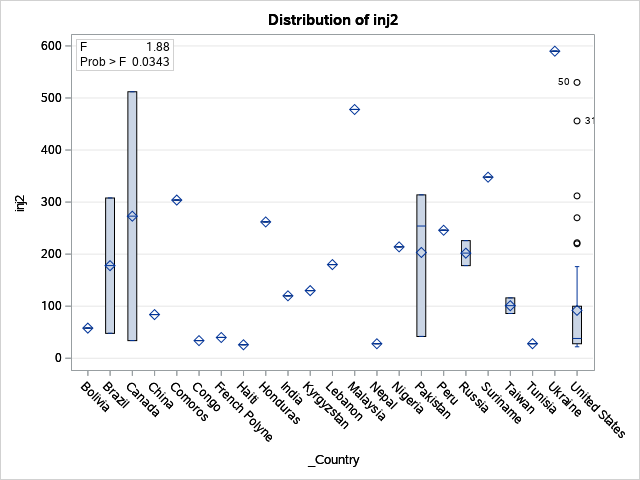
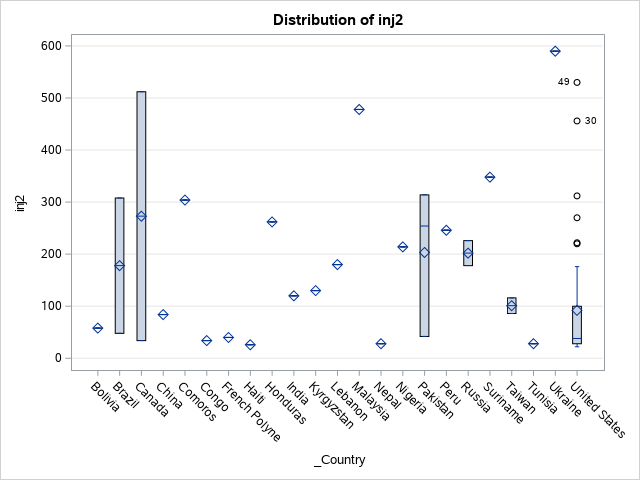

In [23]:
proc anova data=work.planes7;
    class _country;
    model inj2=_country;
    means _country / tuckey;
run;    
        

In [ ]:
%macro counter(number);
%do i=1 %to &number;
    %put --> &i;
%end;
%mend counter;

In [ ]:
%counter(10);

In [25]:
PROC FREQ data=work.planes7;
run;
